<a href="https://colab.research.google.com/github/IAT-ComputationalCreativity-Spring2025/Week3-Rule-Based-Systems/blob/main/l-systems_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A2: L-Systems

## Introduction

I based this code off of the L-Systems lab demo code.

Option 2: Generative Art System

Design an L-System based artwork generator that creates complex visual patterns or natural-looking structures.

Requirements:
- Create at least two different L-System rules
- Implement color and/or line thickness variations
- Allow for parameter adjustments (angles, iterations, etc.)
- Generate at least 3 distinct visual patterns


Import required libraries:

In [1]:
! pip install ColabTurtle

  Preparing metadata (setup.py) ... done
  Created wheel for ColabTurtle: filename=ColabTurtle-2.1.0-py3-none-any.whl size=7642 sha256=434e5d232395d3e7babe464b589f91e5a0857c4ff5b2f8cfb7017b4ae3165439
  Stored in directory: /root/.cache/pip/wheels/f6/9e/81/137e7da25129474562d30f8660be599e5c8d79228cb747e5b9
Successfully built ColabTurtle


In [2]:
import ColabTurtle.Turtle as t
from IPython.display import clear_output

## Basic L-System Implementation

First, let's implement our core L-System functions. These will be used throughout the lab to generate and draw various patterns.

In [3]:
def create_l_system(iterations, axiom, rules):
    """Generate L-System instructions based on axiom and rules."""
    result = axiom
    for _ in range(iterations):
        new_string = ""
        for char in result:
            new_string += rules.get(char, char)
        result = new_string
    return result

def draw_l_system(instructions, angle, distance):
    """Draw the L-System using turtle graphics.

    Parameters:
    - instructions: string of L-System commands
    - angle: turning angle in degrees
    - distance: forward movement distance
    """
    stack = []
    for cmd in instructions:
        if cmd == 'F':  # Move forward and draw
            t.forward(distance)
        elif cmd == 'f':  # Move forward without drawing
            t.penup()
            t.forward(distance)
            t.pendown()
        elif cmd == '+':  # Turn right
            t.right(angle)
        elif cmd == '-':  # Turn left
            t.left(angle)
        elif cmd == '[':  # Save current state
            stack.append((t.position(), t.heading()))
        elif cmd == ']':  # Restore previous state
            position, heading = stack.pop()
            t.penup()
            t.goto(position)
            t.setheading(heading)
            t.pendown()
        elif cmd == '1': #pen size 1
            t.pensize(1)
            t.pencolor(255,200,200)
        elif cmd == '2': #pen size 2
            t.pensize(2)
            t.pencolor(255,225,225)
        elif cmd == '3': #pen size 3
            t.pensize(3)
            t.pencolor(255,255,255)

def setup_turtle():
        t.initializeTurtle()
        t.hideturtle()
        t.speed(13)  # Fastest speed
        t.penup()
        t.goto(t.window_width() // 2, t.window_height() //2 )  # Start position
        t.pendown()


## My Generative System:

Below is the code for my L-system. Each time you run this cell it will generate a new design by choosing a random number of branches and a random angle for the branches. The colour is subtle, but the center is white and fades to a light pink on the outside. The width of the lines changes with the colour.

In [33]:
import random
# Your fractal tree parameters
tree_axiom = "X"

tree_option = random.randint(1,3)
# picks a random tree option
if tree_option == 1:
    tree_rules = {
    "X": "3FF2AFF1BA",
    "A": "F[-F[+AB]-F+A]",
    "B": "F[+F[-AB]+F-B]"
    }
elif tree_option == 2:
      tree_rules = {
      "X": "3FF2AFF1BA",
      "A": "FA[F+AF-B]",
      "B": "FB[F-BF+A]"
      }
elif tree_option == 3:
    tree_rules = {
    "X": "3FF2AFF1BA",
    "A": "F[-AB+[A+BF[-A[+B]]]]",
    "B": "F[+AB-[A-BF[+A[-B]]]]",
    }


tree_iterations = 3
tree_angle = random.randint(20, 90) #picks a random angle between 20 and 90

branch_num = random.randint(3, 6); #number of branches in the 'snow flake'
start_angle= 360/branch_num; #branches are evenly spaced out

setup_turtle()

t.pensize(3)
# Generate and draw
for x in range(0,branch_num) : #draw each branch
  t.left(start_angle) #rotate
  tree_instructions = create_l_system(tree_iterations, tree_axiom, tree_rules)
  draw_l_system(tree_instructions, tree_angle,10)
  #after finishing the branch, return to center
  t.penup()
  t.goto(t.window_width() // 2, t.window_height() //2 )  # Start position
  t.pendown()


# Examples

Here are some examples of the patterns this system can generate:
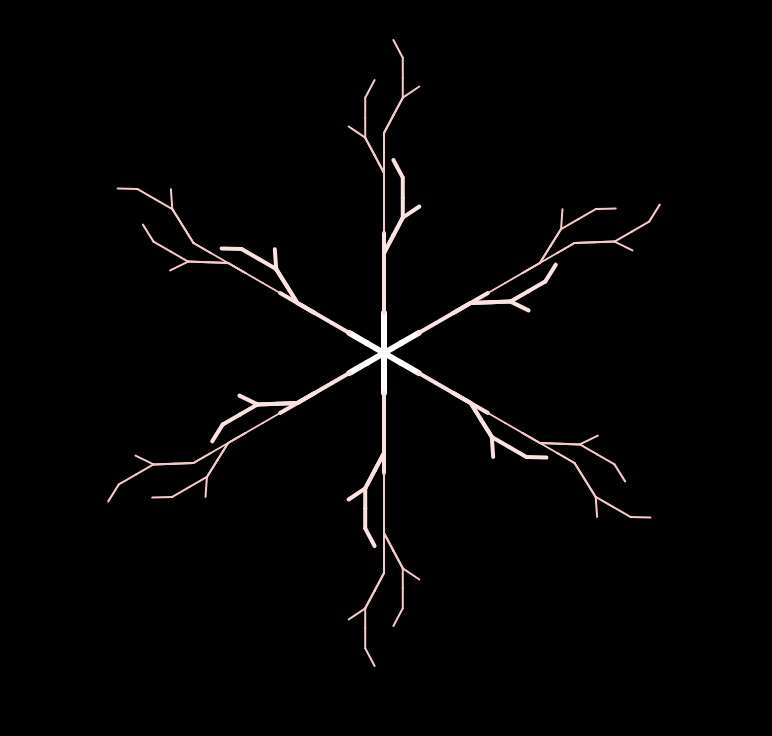

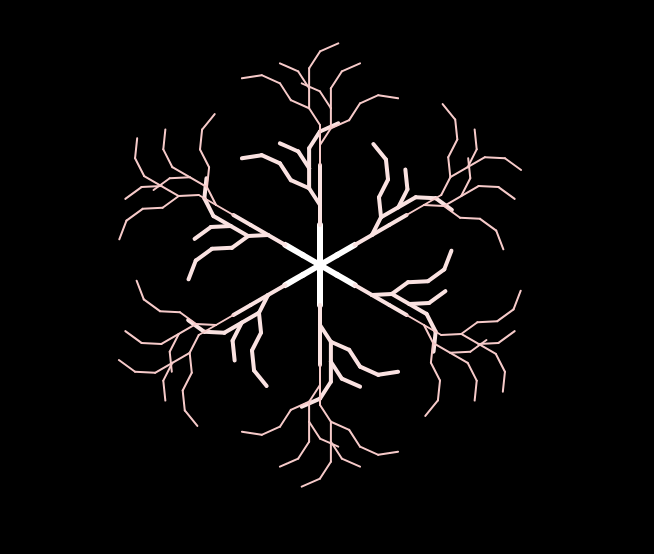



---

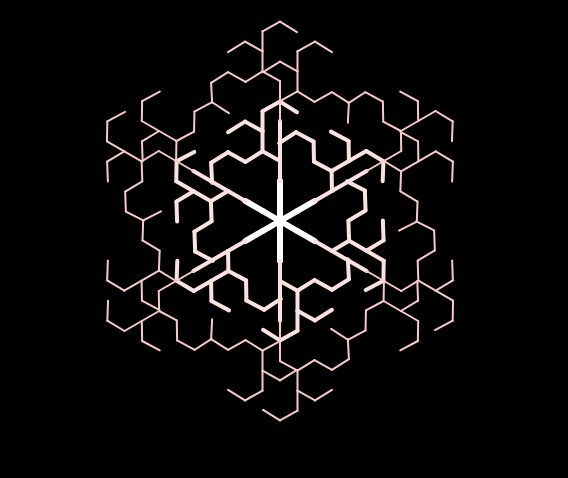

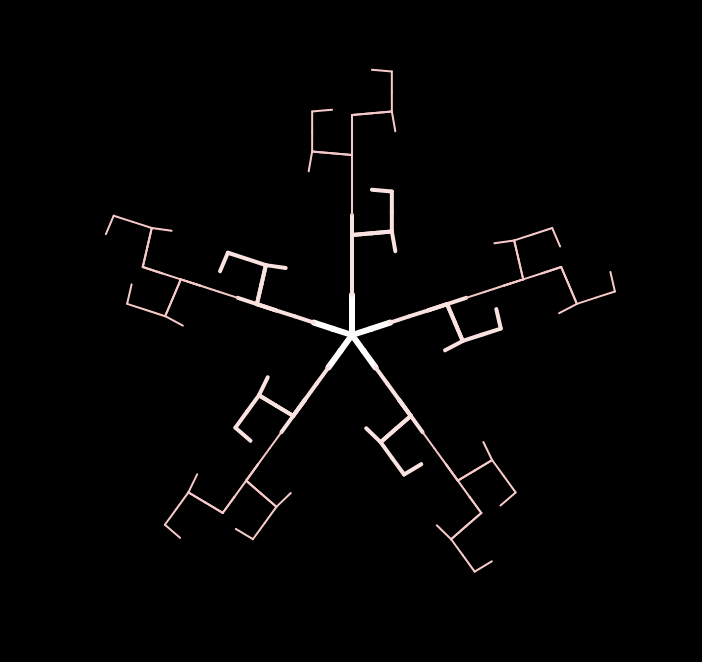

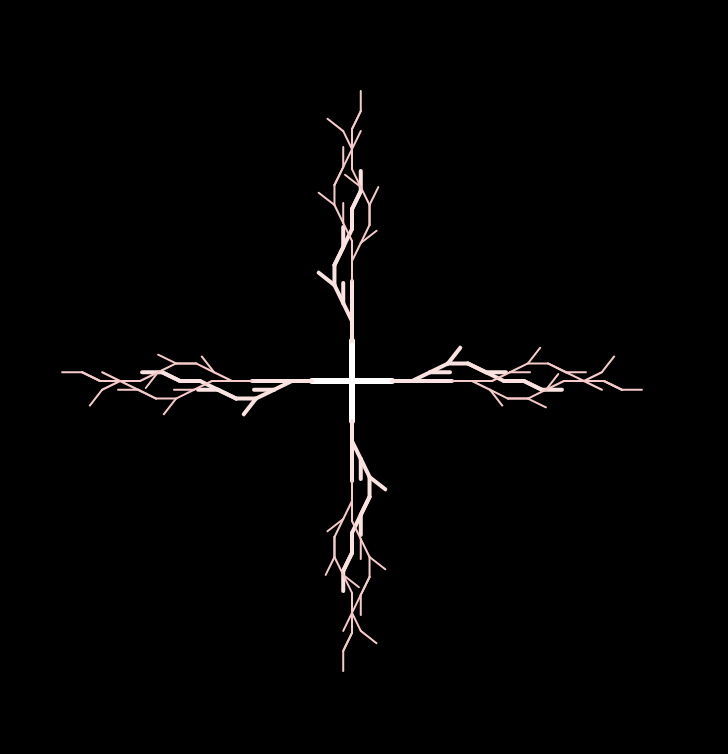